
# Alunos: Fabio Rodrigo Cavalcante da Silva, Manuela Diniz Cavalcanti, Vinicius Bezerra Coelho




# Dataset: IRIS


# Parâmetros Modificados

In [804]:
n_clst = 2

beta = 3
inter = 25
max_gen = inter
iters_max = inter
pop_size_2 = 20
per_crossover = 0.5
p_mut = 0.5


c1_1 = 1
c2_2 = 2
w_1=0.5
swarm_size_1 = 40

# Seleção de características

A Seleção de Características (FS, do inglês "Feature Selection") aborda uma classe de métodos utilizados para extrair informações relevantes de dados. A FS sempre foi um tópico central em Estatísticas Multivariadas e Análise de Dados, mas também recebeu contribuições importantes de matemáticos e cientistas da computação; ao mesmo tempo, a quantidade crescente de dados coletados em muitas aplicações do mundo real, juntamente com a evolução da tecnologia, apresenta novos desafios para os métodos de FS.

Um exemplo desses desafios pode ser encontrado no estudo de dados biológicos e genômicos, onde conjuntos de dados interessantes podem ser compostos por algumas centenas de amostras de tecido nas quais a atividade de dezenas de milhares de genes é medida. A análise desses dados requer a identificação de um número limitado de genes (ou seja, características) capazes de identificar um modelo interessante. Da mesma forma, novas técnicas de coleta de dados baseadas em sensores baratos e na atividade na internet estão criando repositórios muito grandes nos quais informações valiosas podem estar ocultas e precisam ser exploradas.

No cenário geral, a Seleção de Características pode ser descrita da seguinte forma: dado uma matriz de dados definida por um conjunto finito de características medidas em um número finito de objetos, selecionar um subconjunto do conjunto de características que seja especialmente relevante, em relação a todos os outros subconjuntos possíveis, para a análise que será conduzida nos dados em estudo.

Aqui, focamos em aprendizado supervisionado (ou seja, classificação), onde os dados são analisados para identificar um modelo capaz de prever se uma observação pertence a uma ou mais classes, com base nos valores de suas características. No aprendizado supervisionado, a seleção de características opera para selecionar um subconjunto relevante - e possivelmente pequeno - de características a serem utilizadas pelo classificador.

## Tipos de métodos de seleção de características

Os métodos de Seleção de Características podem ser distinguidos de acordo com como os conjuntos de características são avaliados e utilizados na análise de dados. Isso define métodos de** Filtro ("Filter"), Wrapper, e Embedded.** Métodos do primeiro grupo selecionam características de acordo com uma função de pontuação; métodos do segundo grupo testam iterativamente conjuntos de características realizando análise de dados até que um resultado satisfatório seja obtido; pertencem ao terceiro grupo aqueles métodos que selecionam automaticamente as características que parecem ser boas para o propósito de sua análise (Ex.: SVM).

Métodos do tipo Wrappers e Embedded são dependentes do classificador. Filtros muitas vezes são preferíveis por sua natureza independente e velocidade. Porém, modelos baseados em Filtros podem ser de natureza combinatória. Estes tipos de modelo podem ser otimizados através de algoritmos evolucionários para obter boas soluções em um tempo viável.


## Um modelo do tipo filtro para seleção de características

A literatura propõe definições quantitativas alternativas de informação, geralmente relacionadas à extensão com que as características - ou recursos - dos objetos observados variam entre si, partindo da premissa universalmente compartilhada de que uma medida que não varia entre as observações não contém informação. Aqui, consideramos uma medida de informação para dados reais, baseada na distância euclidiana:

$I(X)=\sum_{i=1}^m\sum_{j=i+1}^m\sum_{k=1}^n(x_{ik}-x_{jk})^2$

onde $X$ é um conjunto de dados com $m$ amostras e $n$ variáveis/características. I(X) está diretamente relacionada à variância expressa por X, uma medida amplamente utilizada em estatística e análise de dados, ou então a uma medida de entropia quando as características podem ser descritas por classes qualitativas.

Como antecipado, a tarefa da Seleção de Características é reduzir a dimensão da matriz original. Suponha que fixemos uma dimensão alvo $\beta$ e consideremos a projeção de $X$ em um subconjunto de colunas $N'$ com $|N'| = \beta < n$. Tal problema pode ser facilmente formalizado introduzindo uma variável binária $z_k$ que é igual a 1 quando a característica $k$ é incluída e igual a 0 caso contrário. Então temos o seguinte modelo:

Maximizar $I(X)=\sum_{i=1}^m\sum_{j=i+1}^m\sum_{k=1}^n(x_{ik}-x_{jk})z_k$

sujeito à

$\sum_{k=1}^nz_k = \beta$

$z_k \in \{0,1\}$



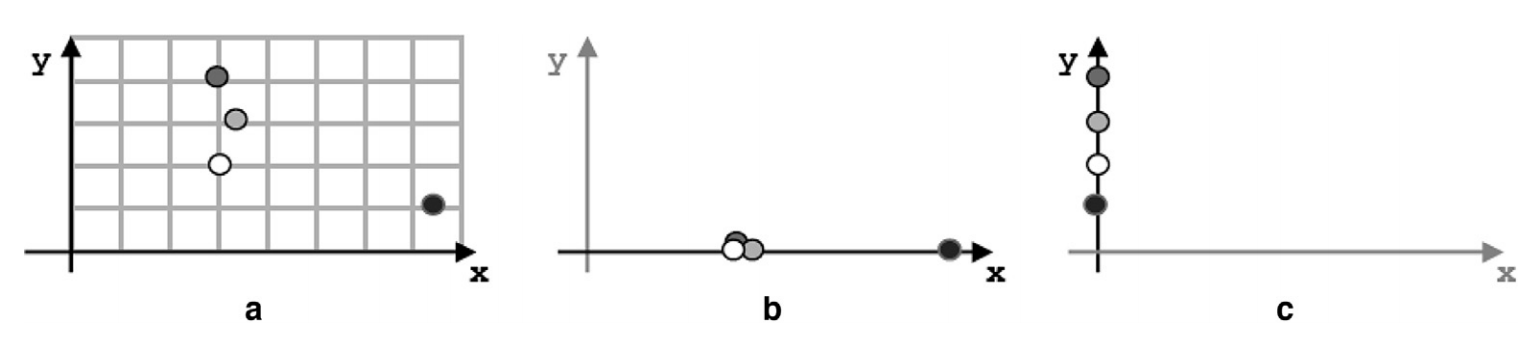

No cenário acima Fig1(a) com um conjunto X contendo 4 amostras e duas características x e y. Com $\beta = 1$ existem duas possibilidades de seleção de características:

- Fig1(b) - projeção do conjunto X em x: I(x) é maior, mas boa parte das amostras estão sobrepostas
- Fig2(c) - projeção do conjunto X em y: I(x) é menor, mas mantém boa separação entre as amostras

Embora não se possa argumentar que uma projeção é melhor do que a outra sem conhecer o propósito final da análise, este simples exemplo chama nossa atenção para um ponto principal: a primeira versão do modelo de filtro pode resultar em projeções que não identificam informações importantes para separar pontos no espaço-alvo.

Uma abordagem alternativa para o problema consiste em exigir - diretamente dentro do modelo de otimização - que todos os pares de pontos sejam distintos por pelo menos uma quantidade mínima $\alpha > 0$ e, em seguida, exigir que essa quantidade seja tão grande quanto possível.

Maximizar $\alpha$

sujeito à

$\sum_{k=1}^n(x_{ik}-x_{jk})z_k \geq \alpha$, para todo $i,j, i<j$

$\sum_{k=1}^nz_k = \beta$

$z_k \in \{0,1\}$, $\alpha \geq 0$

Pode-se adaptar o novo modelo para problemas de classificação:

Maximizar $\alpha$

sujeito à

$\sum_{k=1}^n(x_{ik}-x_{jk})z_k \geq \alpha$, para todo $i,j, c(i) \neq c(j),i<j$

$\sum_{k=1}^nz_k = \beta$

$z_k \in \{0,1\}$, $\alpha \geq 0$

# Resolução através de GA


Imports

In [805]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset IRIS

In [806]:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
iris = load_iris()
# Obter as features (X) e os rótulos (y)
X = iris.data
y = iris.target

In [807]:
# Verificando y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Código do GA
1. Criar função de inicialização da população
2. Criar função para calcular fitness
3. Criar função de seleção
4. Criar função de crossover
5. Criar função de mutação
6. Loop geral

**Chaves aleatórias** são um encoding interessante para a otimização de problemas combinatórios através de algoritmos evolucionários onde deseja-se escolher um subconjunto de itens. Considere um conjunto de dados X com 5 características:
  1. encoding do indivíduo: [0.11 0.47 0.55 0.32 0.25]
  2. Queremos selecionar beta=3 características
  3. Escolher três features com as maiores chaves
  4. indivíduo após decodificação: [0 1 1 1 0 ]


In [808]:
# função que gera pop inicial
def init_pop(P,X):
    """
    Inicialize um conjunto de indivíduos, cada um contendo elementos entre 0 e 1.

    Parâmetros:
    X: dados de treinamento
    P: número de indivíduos na população

    Retorna:
    pop: população inicial
    """
    pop = []
    m, n = X.shape
    for _ in range(P):
        ind = [np.random.uniform(0, 1) for __ in range(n)] # chaves aleatórias
        pop.append(ind)

    return pop

É necessário decodificar indivíduos neste caso. Como queremos escolher um subconjunto de features, é necessário transformar o vetor de chaves aleatórias em um vetor binário.

In [809]:
# Função para decodificar o indivíduo
def decode_ind(ind, beta):
    """
    Decodificar um indivíduo definindo 'beta' elementos com a maior
    probabilidade como 1 e os demais como 0.

    Parâmetros:
    ind: indivíduo a ser decodificado.
    beta: O número de elementos a serem definidos como 1.

    Retorna:
    ind: indivíduo a ser decodificado.
    """

    # Obtenha os índices dos 'beta' maiores elementos
    indices_of_highest = sorted(range(len(ind)), key=lambda i: ind[i], reverse=True)[:beta]
    # []

    # Innicialize o indivíduo decodificado
    decoded_ind = [0] * len(ind)

    # Inclua um total de 'beta' elementos iguais a 1
    for index in indices_of_highest:
        decoded_ind[index] = 1

    return decoded_ind

Vamos simular a geração de 3 indivíduos

In [810]:

pop = init_pop(3,X)
for index, ind in enumerate(pop):
    print(f"ind: {index}, Value: {ind}\n")
    print(f"Decoded: {decode_ind(ind, beta)}\n")

ind: 0, Value: [0.9000566822631005, 0.5379790373844173, 0.9697704533678446, 0.9413600952956935]

Decoded: [1, 0, 1, 1]

ind: 1, Value: [0.5096026646869147, 0.6716191989195304, 0.8526444366539057, 0.2675018324057935]

Decoded: [1, 1, 1, 0]

ind: 2, Value: [0.03642172232792251, 0.24562343630422212, 0.3153132747903806, 0.06984579082779063]

Decoded: [0, 1, 1, 1]



Definir função de fitness

In [811]:
# Função para calcular a fitness
def fitness_function(ind_encoded, beta, X, y):

    # ind é um subconjunto de features: [0 0 1 0 0 1 ...]
    ind = decode_ind(ind_encoded, beta)
    m, n = X.shape
    # inicializar o alpha
    alpha = np.inf
    for i in range(m): # iterate over all samples
        for j in range(i + 1, m): # iterate over all samples
            if y[i] != y[j]: # if i and j are not from the same class
                distance_ij = np.sum([(X[i,k] - X[j,k])**2 * ind[k] for k in range(n)])
                alpha = min(alpha, distance_ij)

    # Maximizando o mínimo alpha, então deve-se negativar o valor antes
    return -alpha

Vamos calcular a fitness de cada um destes indivíduos

score: 0.009999999999999929
[0, 2, 3]


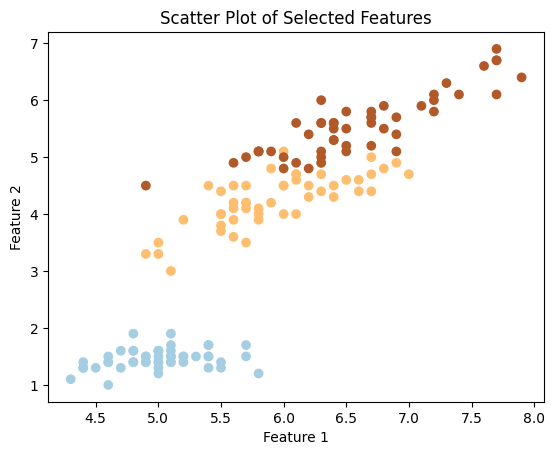

score: 0.009999999999999929
[0, 1, 2]


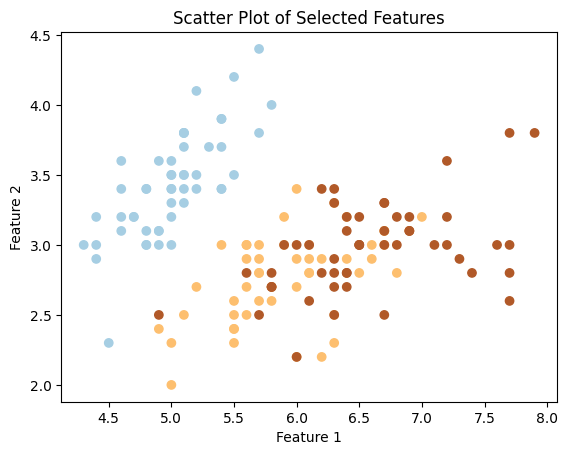

score: 0.01999999999999995
[1, 2, 3]


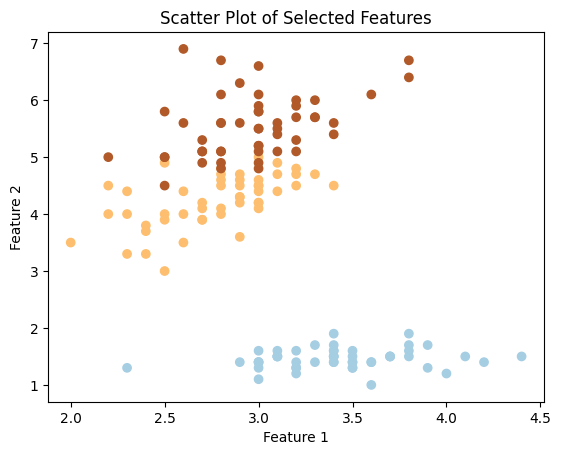

In [812]:
# avaliar os indivíduos
for ind in pop:
  score = fitness_function(ind, beta, X, y)
  print("score: " + str(-score))
  # Plotar os dados com as características escolhidas
  indices = [index for index, value in enumerate(decode_ind(ind, beta)) if value == 1]
  print(indices)
  plt.scatter(X[:, indices[0]], X[:, indices[1]], c=y, cmap=plt.cm.Paired)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Scatter Plot of Selected Features')
  plt.show()


Definir função de seleção

In [813]:
def select_individuals(population, elite_size): # elitism is used
    """
    Selecionar dois indivíduos aleatoriamente da população P vezes.
    Como utilizamos elitismo, devemos reduzir o número de indivídos selecionados

    Parâmetros:
    population: Lista ou array representando a população.
    elite_size: Tamanho da elite

    Retorna:
    Lista de tuplas, cada uma contendo os índices de dois indivíduos selecionados aleatoriamente.
    """
    population_size = len(population)-math.ceil(elite_size)

    selections = []
    for _ in range(population_size):
        # Selecione dois indivíduos aleatoriamente com reposição
        selected_indices = np.random.choice(population_size, size=2, replace=True)
        selections.append(tuple(selected_indices))

    return selections

Vamos simular as seleções de pais

In [814]:
# Vamos simular as seleções de pais
selections = select_individuals(pop, 0)

# Printar seleções
for idx, selected_indices in enumerate(selections):
    print(f"Selection {idx + 1}: {selected_indices}")

Selection 1: (0, 2)
Selection 2: (0, 2)
Selection 3: (1, 0)


Definir função de crosssover

In [815]:
def uniform_crossover(parent1, parent2, crossover_rate=0.5):
    """
    Realizar crossover uniforme entre dois pais.

    Parâmetros:

    parent1: genes do primeiro pai.
    parent2: genes do segundo pai.
    crossover_rate: Probabilidade de selecionar um gene do primeiro pai.

    Retorna:
    genes do filho após o crossover uniforme.
    """

    # Gerar uma lista aleatória booleana, onde o elemento da lista é igual a True, se p < crossover_rate
    mask = np.random.rand(len(parent1)) < crossover_rate

    # Realizar crossover
    child = np.where(mask, parent1, parent2)

    return child.tolist()

Vamos avaliar o crossover

In [816]:
parent1, parent2 = pop[selections[0][0]], pop[selections[0][1]]
child = uniform_crossover(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Child after Uniform Crossover:", child)

Parent 1: [0.9000566822631005, 0.5379790373844173, 0.9697704533678446, 0.9413600952956935]
Parent 2: [0.03642172232792251, 0.24562343630422212, 0.3153132747903806, 0.06984579082779063]
Child after Uniform Crossover: [0.03642172232792251, 0.5379790373844173, 0.3153132747903806, 0.9413600952956935]


Definir função de mutação

In [817]:
def mutation(child, p_m=0.2, mutation_std_dev=0.01):
    """

    Aplicar mutação aos genes de uma criança.

    Parâmetros:
    child: genes da criança.
    p_m: Probabilidade de aplicar mutação a cada gene.
    mutation_std_dev: Desvio padrão da distribuição normal para a mutação.

    Retorna:
    genes da criança após a mutação.

    * obs.: o std_dev foi reduzido e 0.1 para 0.01
    """
    mutated_child = np.copy(child)

    # Faça o loop em cada gene e mute-o com probabilidade p_m
    for i in range(len(child)):
        if np.random.rand() < p_m:
            # Aplique a mutação perturbando o gene com uma distribuição normal
            mutated_child[i] += np.random.normal(loc=0, scale=mutation_std_dev)

    return mutated_child.tolist()

Agora vamos aplicar a mutação na criança gerada

In [818]:
p_mutation = p_mut  # Prob. de mutação

# Mutar a criança
mutated_child = mutation(child, p_mutation)
print("Original Child:", child)
print("Child after Mutation:", mutated_child)

Original Child: [0.03642172232792251, 0.5379790373844173, 0.3153132747903806, 0.9413600952956935]
Child after Mutation: [0.043067861948499896, 0.5395008505050894, 0.3194018417307738, 0.9413600952956935]


Agora será apresentado o código do GA

In [819]:
def genetic_algorithm(pop_size, p_crossover, p_mutation, data, labels, beta, max_generations, elite_size):
    """
    Loop do GA.

    Parâmetros:
    - pop_size: Population size.
    - p_crossover: Crossover probability.
    - p_mutation: Mutation probability.
    - data: Dataset.
    - labels: labels das amostras.
    - beta: tamanho do subconjunto de features
    - max_generations: Maximum number of generations.
    - elite_size: tamanho da elite

    Retorna:
    - Melhor subconjunto de características obtido pelo GA
    """
    # inicializar os dados
    X = data
    y = labels
    # gerar pop inicial
    pop = init_pop(pop_size,X)
    # Listas para guardar melhores fitness e indivíduos
    fitness_over_time = []
    bestind_over_time = []
    for generation in range(max_generations):
        print("G: " + str(generation))
        # Avaliar a fitness de cada indivíduo
        #fitness_values = [fitness_function(ind, beta, X, y) for ind in pop]
        # Encontrar melhores indivíduos de acordo com a fitness
        best_ind = sorted(pop, key=lambda ind: fitness_function(ind, beta, X, y))[:math.ceil(elite_size)]
        # Guardar as melhores fitness e indivíduos
        best_fitness_val = fitness_function(best_ind[0], beta, X, y)
        print(-best_fitness_val)
        fitness_over_time.append(-best_fitness_val)
        bestind_over_time.append(best_ind[0])
        #print(best_ind[0])

        # Selecionar pais para reprodução
        selections = select_individuals(pop, elite_size)

        # Gerar nova pop através de crossover e mutação
        offspring = []
        for parent1, parent2 in selections:
            child = uniform_crossover(pop[parent1], pop[parent2], p_crossover)
            child = mutation(child, p_mutation)
            offspring.append(child)

        # Atualizar população
        pop = offspring
        pop.extend(best_ind)

    return best_ind[0], fitness_over_time, bestind_over_time

G: 0
0.04000000000000007
G: 1
0.04000000000000007
G: 2
0.04000000000000007
G: 3
0.04000000000000007
G: 4
0.04000000000000007
G: 5
0.04000000000000007
G: 6
0.04000000000000007
G: 7
0.04000000000000007
G: 8
0.04000000000000007
G: 9
0.04000000000000007
G: 10
0.04000000000000007
G: 11
0.04000000000000007
G: 12
0.04000000000000007
G: 13
0.04000000000000007
G: 14
0.04000000000000007
G: 15
0.04000000000000007
G: 16
0.04000000000000007
G: 17
0.04000000000000007
G: 18
0.04000000000000007
G: 19
0.04000000000000007
G: 20
0.04000000000000007
G: 21
0.04000000000000007
G: 22
0.04000000000000007
G: 23
0.04000000000000007
G: 24
0.04000000000000007
Tempo de execução GA: 0.64 minutos
score: 0.04000000000000007


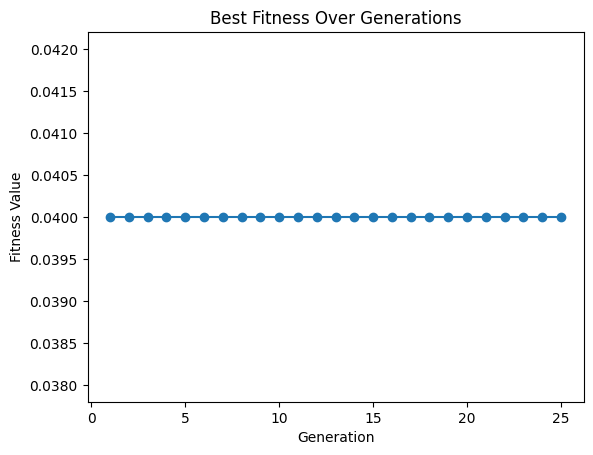

In [820]:
import time
tempo_inicio_ga = time.time()

# beta = 2
pop_size = pop_size_2
best_ind, fitness_over_time, _ = genetic_algorithm(pop_size = pop_size,
                              p_crossover = per_crossover,
                              p_mutation = p_mut,
                              data = X,
                              labels = y,
                              beta = beta,
                              # max_generations = 10,
                              max_generations = max_gen,
                              elite_size=0.5*pop_size)

# Cálculo do tempo de execução
tempo_final_ga = time.time()
tempo_GA = (tempo_final_ga - tempo_inicio_ga)/60
print(f"Tempo de execução GA: {tempo_GA:.2f} minutos")

score_ga = fitness_function(best_ind, beta, X, y)
print("score: " + str(-score_ga))

# Plot the fitness values over generations
plt.plot(range(1, len(fitness_over_time) + 1), fitness_over_time, marker='o')
plt.title('Best Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.show()

Agora vamos avaliar um classificador que utiliza um algoritmo genético para selecionar as características.

In [821]:
# Criar conjunto de dados sintético
# n_clst = 2
# n_feat = 10
# X, y = make_classification(n_samples=150, n_features=n_feat, n_classes=n_clst, n_clusters_per_class=1, n_redundant=0, random_state=1000)

In [822]:
# Passo 1: Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 2: Selecionar um subconjunto de características de X com o GA
# beta = 2
# pop_size = 40
best_ind, fitness_over_time, bestind_over_time = genetic_algorithm(pop_size = pop_size,
                              p_crossover = per_crossover,
                              p_mutation = p_mut,
                              data = X_train,
                              labels = y_train,
                              beta = beta,
                              # max_generations = 10,
                              max_generations = max_gen,
                              elite_size=0.5*pop_size)

print(len(best_ind))
selected_cols= [index for index, value in enumerate(decode_ind(best_ind, beta)) if value == 1]

G: 0
0.04000000000000007
G: 1
0.04000000000000007
G: 2
0.04000000000000007
G: 3
0.04000000000000007
G: 4
0.04000000000000007
G: 5
0.04000000000000007
G: 6
0.04000000000000007
G: 7
0.04000000000000007
G: 8
0.04000000000000007
G: 9
0.04000000000000007
G: 10
0.04000000000000007
G: 11
0.04000000000000007
G: 12
0.04000000000000007
G: 13
0.04000000000000007
G: 14
0.04000000000000007
G: 15
0.04000000000000007
G: 16
0.04000000000000007
G: 17
0.04000000000000007
G: 18
0.04000000000000007
G: 19
0.04000000000000007
G: 20
0.04000000000000007
G: 21
0.04000000000000007
G: 22
0.04000000000000007
G: 23
0.04000000000000007
G: 24
0.04000000000000007
4


In [823]:
# Supondo que X seja seu conjunto de dados, selected_cols seja o subconjunto de características (índices de colunas)
# y seja sua variável alvo

# Passo 3: Treinar os classificadores usando o subconjunto de características e todas as características separadamente
print(selected_cols)

# Subconjunto de características
X_subset_train = X_train[:, selected_cols]
X_subset_test = X_test[:, selected_cols]

# Todas as características
# Não é necessário modificar X_train ou X_test, pois eles já contêm todas as características

# Inicializar classificadores
classifier_subset = LogisticRegression(random_state=42)
classifier_all_features = LogisticRegression(random_state=42)

# Treinar classificadores
classifier_subset.fit(X_subset_train, y_train)
classifier_all_features.fit(X_train, y_train)

# Passo 4: Avaliar e comparar o desempenho dos classificadores

# Fazer previsões
y_pred_subset = classifier_subset.predict(X_subset_test)
y_pred_all_features = classifier_all_features.predict(X_test)

# Avaliar a precisão
accuracy_subset_ga = accuracy_score(y_test, y_pred_subset)
accuracy_all_features_ga = accuracy_score(y_test, y_pred_all_features)

# Imprimir resultados
print(f"Precisão com subconjunto de características: {accuracy_subset_ga:.2f}")
print(f"Precisão com todas as características: {accuracy_all_features_ga:.2f}")

[0, 1, 3]
Precisão com subconjunto de características: 1.00
Precisão com todas as características: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


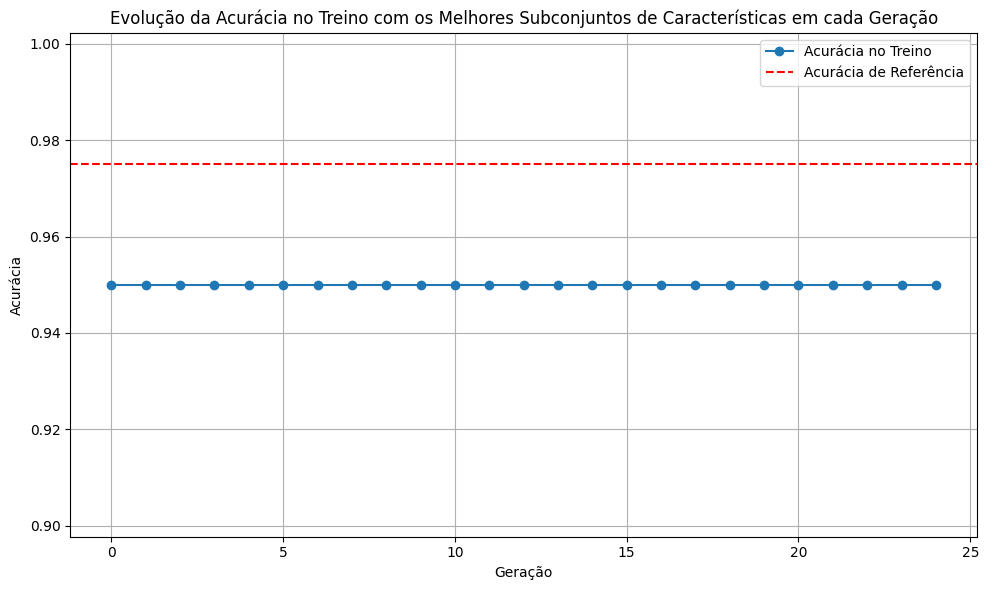

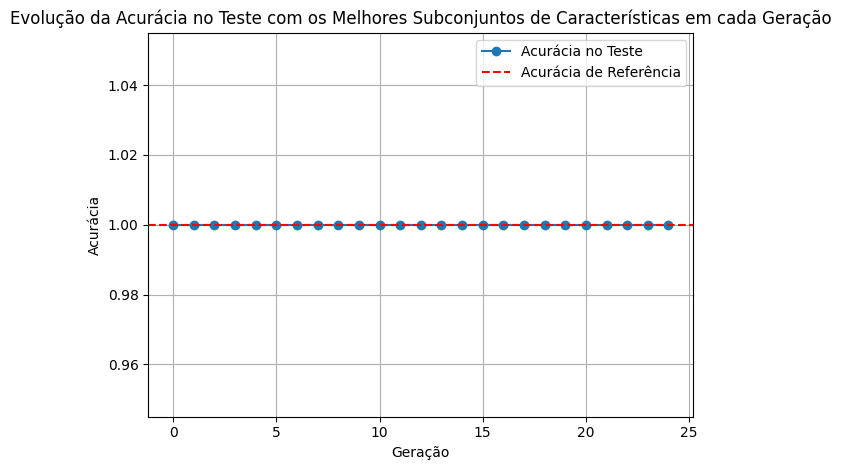

In [824]:
# Supondo que X seja seu conjunto de dados, subsets seja uma lista de selected_cols e y seja sua variável alvo

# Inicializar o classificador de referência usando todas as características
classifier_all_features = LogisticRegression(random_state=42)
classifier_all_features.fit(X_train, y_train)

# Avaliar o desempenho de referência
baseline_accuracy_train = accuracy_score(y_train, classifier_all_features.predict(X_train))
baseline_accuracy_test = accuracy_score(y_test, classifier_all_features.predict(X_test))

# Armazenar os resultados de referência
train_accuracies = []
test_accuracies = []

# Iterar sobre subconjuntos de características
for ind in bestind_over_time:
    subset = [index for index, value in enumerate(decode_ind(ind, beta)) if value == 1]
    # Extrair o subconjunto de características
    X_subset_train = X_train[:, subset]
    X_subset_test = X_test[:, subset]

    # Inicializar e treinar o classificador
    classifier_subset = LogisticRegression(random_state=42)
    classifier_subset.fit(X_subset_train, y_train)

    # Avaliar o desempenho
    accuracy_train_ga = accuracy_score(y_train, classifier_subset.predict(X_subset_train))
    accuracy_test_ga = accuracy_score(y_test, classifier_subset.predict(X_subset_test))
    # Armazenar os resultados
    train_accuracies.append(accuracy_train_ga)
    test_accuracies.append(accuracy_test_ga)


# Gráfico do treino
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, marker='o', label='Acurácia no Treino')
# Desenhe uma linha constante para o baseline (classificador que usa todas as características)
plt.axhline(y=baseline_accuracy_train, color='r', linestyle='--', label='Acurácia de Referência')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia no Treino com os Melhores Subconjuntos de Características em cada Geração')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico do teste
plt.plot(test_accuracies, marker='o', label='Acurácia no Teste')
# Desenhe uma linha constante para o baseline (classificador que usa todas as características)
plt.axhline(y=baseline_accuracy_test, color='r', linestyle='--', label='Acurácia de Referência')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia no Teste com os Melhores Subconjuntos de Características em cada Geração')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Resolvendo com PSO

In [825]:
# Create a toy dataset
# n_clst = 2
# n_feat = 100
# X, y = make_classification(n_samples=50, n_features=n_feat, n_classes=n_clst, n_clusters_per_class=1, n_redundant=0, random_state=1000)

Definir função que gera o enxame inicial

In [826]:
# função que gera enxame inicial
def init_swarm(P,X):
    """
    Inicialize um enxame com P partículas, cada uma contendo elementos entre 0 e 1.

    Parâmetros:
    X: dados de treinamento
    P: número de indivíduos no enxame

    Retorna:
    pos = posição inicial das P partículas do enxame
    vel = velocidade inicial das P partículas do enxame
    pos_best = vetor de melhores posições conhecidas pela partícula
    """
    pos = []
    vel = []
    pos_best = []
    m, n = X.shape
    for _ in range(P):
        pos_ind = [np.random.uniform(0, 1) for __ in range(n)] # chaves aleatórias
        pos.append(pos_ind)
        pos_best.append(pos_ind)
        vel.append(np.random.uniform(-1,1, size = n))

    return pos, vel, pos_best

Vamos simular a geração de 3 indivíduos com 2 centróides cada

In [827]:
# com beta = 2
# beta = 2
pos_swarm, vel_swarm, pos_best = init_swarm(3,X)
for index, value in enumerate(pos_swarm):
    print(f"ind: {index}, Pos: {value}, Vel: {vel_swarm[index]}\n")
    print(f"Decoded: {decode_ind(value, beta)}\n")

ind: 0, Pos: [0.7295516756235044, 0.517953897281113, 0.8550210593693176, 0.9022386694364632], Vel: [ 0.04718848 -0.46916192  0.93324448  0.20872062]

Decoded: [1, 0, 1, 1]

ind: 1, Pos: [0.27333342674460204, 0.414233838025412, 0.13464884779481723, 0.25589895823134], Vel: [ 0.84022088 -0.24484043  0.43623433  0.39170478]

Decoded: [1, 1, 0, 1]

ind: 2, Pos: [0.2642357181737669, 0.4799398211246182, 0.8814257471597408, 0.25971936720452515], Vel: [-0.39753559 -0.18992187 -0.50260515  0.47852705]

Decoded: [1, 1, 1, 0]



Avaliar os três indivíduos

score: 0.009999999999999929
[0, 2, 3]


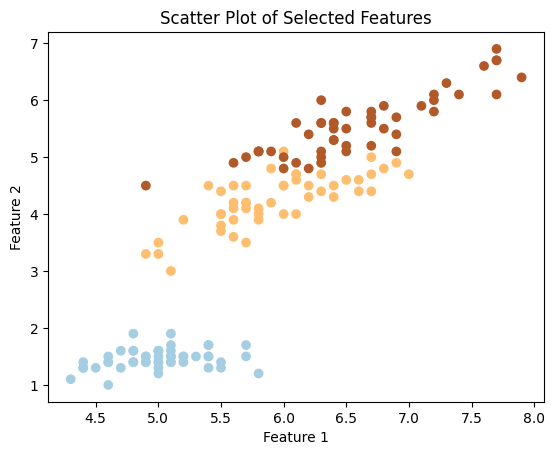

score: 0.04000000000000007
[0, 1, 3]


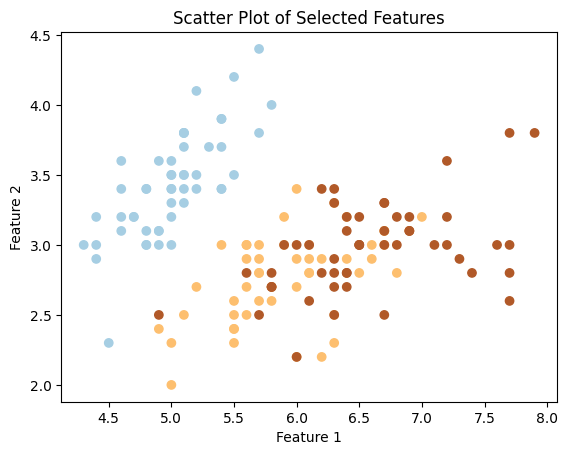

score: 0.009999999999999929
[0, 1, 2]


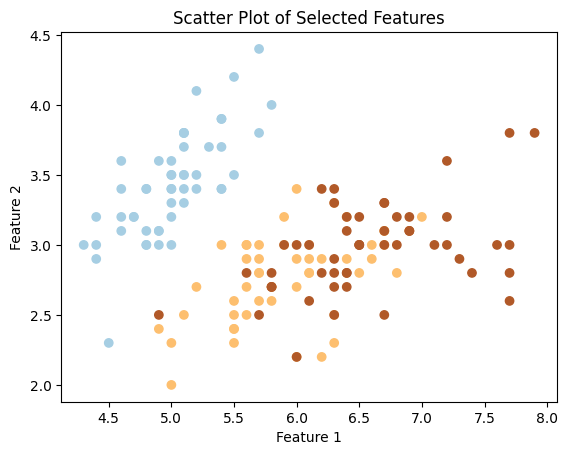

In [828]:
# avaliar os indivíduos
for ind in pos_swarm:
  score_pso = fitness_function(ind, beta, X, y)
  print("score: " + str(-score_pso))
  # Plotar os dados com as características escolhidas
  indices = [index for index, value in enumerate(decode_ind(ind, beta)) if value == 1]
  print(indices)
  plt.scatter(X[:, indices[0]], X[:, indices[1]], c=y, cmap=plt.cm.Paired)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Scatter Plot of Selected Features')
  plt.show()


Definir função que atualiza a velocidade das partículas

In [829]:
# atualizar velocidade da partícula
def update_velocity(pos, vel, pos_best, global_best, w, c1, c2):
  '''
    Atualiza a velocidade da partícula usando a fórmula da Otimização por Enxame de Partículas (PSO).

    Parâmetros:
    pos: posição atual da partícula
    vel: velocidade atual da partícula
    pos_best: Melhor posição global entre todas as partículas.
    c1: Parâmetro cognitivo.
    c2: Parâmetro social.
    w: Peso de inércia.

    Retorna:
    - Velocidade atualizada para a partícula.
  '''
  # inicializar vel atualizada
  vel_updated = []
  # loop em cada posição i da partícula
  for i in range(len(pos)):
      # Gera números aleatórios no intervalo [0, 1]
      r1 = np.random.uniform(0,1)
      r2 = np.random.uniform(0,1)

      # Calcula os componentes cognitivo e social da atualização de velocidade
      vel_cognitive = c1 * r1 * (pos_best[i] - pos[i])
      vel_social = c2 * r2 * (global_best[i] - pos[i])

      # Atualiza a velocidade i usando a fórmula do PSO
      vel_updated.append(w * vel[i] + vel_cognitive + vel_social)

  # Retorna a velocidade atualizada para a partícula
  return np.array(vel_updated)

Atualizar a velocidade das partículas do enxame

In [830]:
# selecionar melhor indivíduo com base na fitness
best_ind = min(pos_swarm, key=lambda ind: fitness_function(ind, beta, X, y))

# atualizar
vel_before = vel_swarm.copy()
for j in range(3):
  vel_swarm[j] = update_velocity(pos_swarm[j], vel_swarm[j], pos_best[j], best_ind, w=w_1, c1=c1_1, c2=c2_2)

for j, value in enumerate(pos_swarm):
    print(f"ind: {j}, Pos: {value}, \n Vel_updated: {vel_swarm[j]}\nVel_before: {vel_before[j]}")

ind: 0, Pos: [0.7295516756235044, 0.517953897281113, 0.8550210593693176, 0.9022386694364632], 
 Vel_updated: [-0.32378415 -0.39668574  0.20620676 -0.7640789 ]
Vel_before: [ 0.04718848 -0.46916192  0.93324448  0.20872062]
ind: 1, Pos: [0.27333342674460204, 0.414233838025412, 0.13464884779481723, 0.25589895823134], 
 Vel_updated: [ 0.42011044 -0.12242021  0.21811717  0.19585239]
Vel_before: [ 0.84022088 -0.24484043  0.43623433  0.39170478]
ind: 2, Pos: [0.2642357181737669, 0.4799398211246182, 0.8814257471597408, 0.25971936720452515], 
 Vel_updated: [-0.19728188 -0.20501215 -0.31226576  0.23311478]
Vel_before: [-0.39753559 -0.18992187 -0.50260515  0.47852705]


Definir função que atualiza a posição

In [831]:
# definir função de atualização da posição
def update_position(pos, vel, bounds):
  '''
    Atualiza a posição da partícula a partir da nova velocidade.

    Parâmetros:
    pos: posição atual da partícula
    vel: velocidade atualizada da partícula
    bounds: limites do ambiente

    Retorna:
    - Velocidade atualizada para a partícula.
  '''
  pos_updated = []
  for i in range(len(pos)):
      pos_updated.append(np.clip(pos[i]+vel[i], a_min=bounds[0], a_max=bounds[1]))
  return pos_updated

Atualizar posição dos indivíduos

In [832]:
# atualizar
pos_before = pos_swarm.copy()
for j in range(3):
  pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], [0,1])

for j, value in enumerate(pos_swarm):
    print(f"ind: {j}, Pos_updated: {value}, \n Vel_updated: {vel_swarm[j]}\npos_before: {pos_before[j]}")

ind: 0, Pos_updated: [0.40576752934430554, 0.12126815991753015, 1.0, 0.13815976885252912], 
 Vel_updated: [-0.32378415 -0.39668574  0.20620676 -0.7640789 ]
pos_before: [0.7295516756235044, 0.517953897281113, 0.8550210593693176, 0.9022386694364632]
ind: 1, Pos_updated: [0.6934438672332764, 0.2918136244779479, 0.35276601508719474, 0.45175135043967296], 
 Vel_updated: [ 0.42011044 -0.12242021  0.21811717  0.19585239]
pos_before: [0.27333342674460204, 0.414233838025412, 0.13464884779481723, 0.25589895823134]
ind: 2, Pos_updated: [0.06695384083555672, 0.2749276757749832, 0.5691599851167264, 0.4928341447723389], 
 Vel_updated: [-0.19728188 -0.20501215 -0.31226576  0.23311478]
pos_before: [0.2642357181737669, 0.4799398211246182, 0.8814257471597408, 0.25971936720452515]


Definir loop geral

In [833]:
def pso(swarm_size, c1, c2, w, data, labels, beta, max_iters):
  """
  Loop do PSO.

  Parâmetros:
  swarm_size: num de partículas.
  c1: Parâmetro cognitivo.
  c2: Parâmetro social.
  w: Peso de inércia.
  data: Dataset.
  labels: labels das amostras.
  beta: tamanho do subconjunto de features
  max_iters: Número máximo de períodos.

  Retorna:
  Melhor subconjunto de features obtido pelo pso
  """
  # inicializar os dados
  X = data
  y = labels
  bounds = [0, 1] # já que posições são chaves aleatórias
  # inicializar o enxame
  pos_swarm, vel_swarm, pos_best_swarm = init_swarm(swarm_size,X)
  # lista para armazenar evolução da fitness
  fitness_over_time = []
  bestind_over_time = []

  # comece o loop
  best_ind = pos_swarm[0] # initialize global best
  for iter in range(max_iters):
      print("iter: " + str(iter))
      # avaliar fitness das partículas do enxame
      global_best_fitness = fitness_function(best_ind, beta, X, y) # fitness da melhor posição global
      for j,ind in enumerate(pos_swarm):
        score_pso_1 = fitness_function(ind, beta, X, y) # fitness da posição atual
        score_known_best = fitness_function(pos_best_swarm[j], beta, X, y) # fitness da melhor posição conhecida
        if score_pso_1 < score_known_best:
          pos_best_swarm[j] = ind # se uma posição melhor for encontrada
        if score_pso_1 < global_best_fitness:
          best_ind = ind

      # armazenar melhor fitness deste período
      best_fitness_val = fitness_function(best_ind, beta, X, y)
      print(-best_fitness_val)
      fitness_over_time.append(-best_fitness_val)
      bestind_over_time.append(best_ind)

      # cycle through swarm and update velocities and position
      for j in range(swarm_size):
          vel_swarm[j] = update_velocity(pos_swarm[j], vel_swarm[j], pos_best_swarm[j], best_ind, w, c1, c2)
          #pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], [-1000,1000])
          pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], bounds)

  return best_ind, fitness_over_time, bestind_over_time

Testando o enxame de partículas na otimização dos centróides do K-means

iter: 0
0.01999999999999995
iter: 1
0.04000000000000007
iter: 2
0.04000000000000007
iter: 3
0.04000000000000007
iter: 4
0.04000000000000007
iter: 5
0.04000000000000007
iter: 6
0.04000000000000007
iter: 7
0.04000000000000007
iter: 8
0.04000000000000007
iter: 9
0.04000000000000007
iter: 10
0.04000000000000007
iter: 11
0.04000000000000007
iter: 12
0.04000000000000007
iter: 13
0.04000000000000007
iter: 14
0.04000000000000007
iter: 15
0.04000000000000007
iter: 16
0.04000000000000007
iter: 17
0.04000000000000007
iter: 18
0.04000000000000007
iter: 19
0.04000000000000007
iter: 20
0.04000000000000007
iter: 21
0.04000000000000007
iter: 22
0.04000000000000007
iter: 23
0.04000000000000007
iter: 24
0.04000000000000007
Tempo de execução PSO: 2.53 minutos
score_pso2: 0.04000000000000007


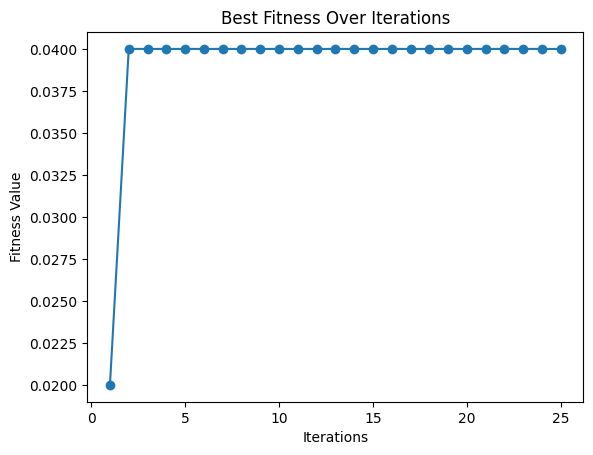

In [834]:
# beta = 2
tempo_inicio_pso = time.time()
swarm_size = swarm_size_1
best_ind, fitness_over_time, _ = pso(swarm_size = swarm_size,
                              c1=c1_1,
                              c2=c2_2,
                              w=w_1,
                              data = X,
                              labels = y,
                              beta = beta,
                              # max_iters = 10
                              max_iters = iters_max
                              )
# Cálculo do tempo de execução
tempo_final_pso = time.time()
tempo_PSO = (tempo_final_pso - tempo_inicio_pso)/60
print(f"Tempo de execução PSO: {tempo_PSO:.2f} minutos")

score_pso2 = fitness_function(best_ind, beta, X, y)
#print("final ind: " + str(best_ind))
print("score_pso2: " + str(-score_pso2))

# Plotar fitness ao longo das iterações
plt.plot(range(1, len(fitness_over_time) + 1), fitness_over_time, marker='o')
plt.title('Best Fitness Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.show()

Agora vamos avaliar um classificador que utiliza PSO para selecionar as características.

In [835]:
# Criar conjunto de dados sintético
# n_clst = 2
# n_feat = 100
# X, y = make_classification(n_samples=100, n_features=n_feat, n_classes=n_clst, n_clusters_per_class=1, n_redundant=0, random_state=1000)

In [ ]:
# Passo 1: Dividir o conjunto de dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 2: Selecionar um subconjunto de características de X com o PSO
# beta = 2
# swarm_size = 40
best_ind, fitness_over_time, bestind_over_time = pso(swarm_size = swarm_size,
                              c1=c1_1,
                              c2=c2_2,
                              w=w_1,
                              data = X,
                              labels = y,
                              beta = beta,
                              # max_iters = 10)
                              max_iters = iters_max)

print(len(best_ind))
selected_cols= [index for index, value in enumerate(decode_ind(best_ind, beta)) if value == 1]

iter: 0
0.04000000000000007
iter: 1
0.04000000000000007
iter: 2
0.04000000000000007
iter: 3
0.04000000000000007
iter: 4
0.04000000000000007
iter: 5
0.04000000000000007
iter: 6
0.04000000000000007
iter: 7
0.04000000000000007
iter: 8
0.04000000000000007
iter: 9
0.04000000000000007
iter: 10
0.04000000000000007
iter: 11
0.04000000000000007
iter: 12
0.04000000000000007
iter: 13
0.04000000000000007
iter: 14
0.04000000000000007
iter: 15
0.04000000000000007
iter: 16
0.04000000000000007
iter: 17
0.04000000000000007
iter: 18
0.04000000000000007
iter: 19
0.04000000000000007
iter: 20
0.04000000000000007
iter: 21
0.04000000000000007
iter: 22
0.04000000000000007
iter: 23
0.04000000000000007
iter: 24
0.04000000000000007
4


In [ ]:
# Supondo que X seja seu conjunto de dados, selected_cols seja o subconjunto de características (índices de colunas)
# y seja sua variável alvo

# Passo 3: Treinar os classificadores usando o subconjunto de características e todas as características separadamente
print(selected_cols)

# Subconjunto de características
X_subset_train = X_train[:, selected_cols]
X_subset_test = X_test[:, selected_cols]

# Todas as características
# Não é necessário modificar X_train ou X_test, pois eles já contêm todas as características

# Inicializar classificadores
classifier_subset = LogisticRegression(random_state=42)
classifier_all_features = LogisticRegression(random_state=42)

# Treinar classificadores
classifier_subset.fit(X_subset_train, y_train)
classifier_all_features.fit(X_train, y_train)

# Passo 4: Avaliar e comparar o desempenho dos classificadores

# Fazer previsões
y_pred_subset = classifier_subset.predict(X_subset_test)
y_pred_all_features = classifier_all_features.predict(X_test)

# Avaliar a precisão
accuracy_subset_pso = accuracy_score(y_test, y_pred_subset)
accuracy_all_features_pso = accuracy_score(y_test, y_pred_all_features)

# Imprimir resultados
print(f"Precisão com subconjunto de características: {accuracy_subset_pso:.2f}")
print(f"Precisão com todas as características: {accuracy_all_features_pso:.2f}")

In [ ]:
# Supondo que X seja seu conjunto de dados, subsets seja uma lista de selected_cols e y seja sua variável alvo

# Inicializar o classificador de referência usando todas as características
classifier_all_features = LogisticRegression(random_state=42)
classifier_all_features.fit(X_train, y_train)

# Avaliar o desempenho de referência
baseline_accuracy_train = accuracy_score(y_train, classifier_all_features.predict(X_train))
baseline_accuracy_test = accuracy_score(y_test, classifier_all_features.predict(X_test))

# Armazenar os resultados de referência
train_accuracies = []
test_accuracies = []

# Iterar sobre subconjuntos de características
for ind in bestind_over_time:
    subset = [index for index, value in enumerate(decode_ind(ind, beta)) if value == 1]
    # Extrair o subconjunto de características
    X_subset_train = X_train[:, subset]
    X_subset_test = X_test[:, subset]

    # Inicializar e treinar o classificador
    classifier_subset = LogisticRegression(random_state=42)
    classifier_subset.fit(X_subset_train, y_train)

    # Avaliar o desempenho
    accuracy_train_pso = accuracy_score(y_train, classifier_subset.predict(X_subset_train))
    accuracy_test_pso = accuracy_score(y_test, classifier_subset.predict(X_subset_test))

    # Armazenar os resultados
    train_accuracies.append(accuracy_train_pso)
    test_accuracies.append(accuracy_test_pso)


# Gráfico do treino
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, marker='o', label='Acurácia no Treino')
# Desenhe uma linha constante para o baseline (classificador que usa todas as características)
plt.axhline(y=baseline_accuracy_train, color='r', linestyle='--', label='Acurácia de Referência')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia no Treino com os Melhores Subconjuntos de Características em cada iteração')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico do teste
plt.plot(test_accuracies, marker='o', label='Acurácia no Teste')
# Desenhe uma linha constante para o baseline (classificador que usa todas as características)
plt.axhline(y=baseline_accuracy_test, color='r', linestyle='--', label='Acurácia de Referência')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia no Teste com os Melhores Subconjuntos de Características em cada iteração')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###Atividade:
Escolher pelo menos três conjuntos de dados do sklearn (ou outra fonte) ou conjuntos de dados sintéticos e avaliar a performance de um ou mais classificadores que utilizam subconjuntos de características escolhidos pelo GA e PSO. Comparar a performance dos classificadores com o subconjunto de características e com todas as características. Considere um número igual de gerações para o PSO e para o GA. Se possível plotar um gráfico:

- uma linha constante representando o valor da métrica do classificador utilizado como baseline
- uma linha mostrando a evolução da performance do classificador + GA ao longo das gerações
- uma linha mostrando a evolução da performance do classificador + PSO ao longo das gerações

Tentar avaliar a performance através de validação cruzada. Tentar avaliar contra outras abordagens de extração de características (PCA), seleção de características (https://scikit-learn.org/stable/modules/feature_selection.html) ou regularização (L1, L2, ou outras). Tente avaliar como a performance dos algoritmos evolucionários é afetada com diferentes valores dos hiperparâmetros. Se possível, avaliar como o tempo de otimização dos algoritmos evolucionários aumenta a medida que o número de características e amostras aumenta (dica: utilizar o gerador de datasets).

# Função para avaliar desempenho com PCA

In [ ]:
# # Função para avaliar desempenho com PCA
# from sklearn.decomposition import PCA

# def evaluate_with_pca(X_train, X_test, y_train, y_test):
#     pca = PCA(n_components=2)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)

#     # Inicializar e treinar o classificador usando PCA
#     classifier_pca = LogisticRegression(random_state=42)
#     classifier_pca.fit(X_train_pca, y_train)

#     # Previsões no conjunto de teste
#     y_pred_pca = classifier_pca.predict(X_test_pca)

#     # Avaliar a acurácia
#     accuracy_pca = accuracy_score(y_test, y_pred_pca)

#     return accuracy_pca

# # Avaliar desempenho com PCA
# accuracy_pca = evaluate_with_pca(X_train, X_test, y_train, y_test)
# print(f"Precisão com PCA: {accuracy_pca:.2f}")
# print(f"Precisão com GA: {accuracy_test_ga:.2f}")
# print(f"Precisão com PSO: {accuracy_test_pso:.2f}")
# print(f"Precisão baseline: {baseline_accuracy_test:.2f}")

# ga_accuracies_test = []
# pso_accuracies_test = []

# pca_accuracies_test = []
# max_generations = max_gen


# for generation in range(max_generations):
#     # (código existente)
#     # Avaliar desempenho do modelo baseado no Algoritmo Genético no conjunto de teste
#     ga_accuracies_test.append(accuracy_test_ga)
#     pso_accuracies_test.append(accuracy_test_pso)

#     # Avaliar desempenho do modelo baseado no PCA no conjunto de teste
#     accuracy_pca_test = evaluate_with_pca(X_train, X_test, y_train, y_test)
#     pca_accuracies_test.append(accuracy_pca_test)

# # Geração do gráfico de Acurácia vs Gerações
# plt.plot(ga_accuracies_test, marker='o', label='Algoritmo Genético (Teste)')
# plt.plot(pso_accuracies_test, marker='o', label='Algoritmo PSO (Teste)')
# plt.plot(pca_accuracies_test, marker='o', label='PCA (Teste)')
# plt.axhline(y=baseline_accuracy_test, color='r', linestyle='--', label='Acurácia de Referência')
# plt.xlabel('Geração')
# plt.ylabel('Acurácia')
# plt.title('Evolução da Acurácia no Teste com Algoritmo Genético, PSO vs PCA em cada Geração')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
print('beta', beta)
print('p_mutation', p_mut)
print('crossover_rate', per_crossover)
print('pop_size', pop_size_2)
print('max_generations', max_gen)
print(f"Tempo de execução GA: {tempo_GA:.2f} minutos")
print(f"Tempo de execução PSO: {tempo_PSO:.2f} minutos")
print('score_ga', str(-score_ga))
# print('score_ga', -score_ga)
print('score_pso2', str(-score_pso2))
# print('score_pso2', -score_pso2)
print('c1', c1_1)
print('c2', c2_2)
print('w', w_1)
print('swarm_size', swarm_size_1)

print('GA')
print(f"Precisão com subconjunto de características: {accuracy_subset_pso:.2f}")
print(f"Precisão com todas as características: {accuracy_all_features_pso:.2f}")


print('PSO')
print(f"Precisão com subconjunto de características: {accuracy_subset_ga:.2f}")
print(f"Precisão com todas as características: {accuracy_all_features_ga:.2f}")


beta 3
p_mutation 0.5
crossover_rate 0.5
pop_size 20
max_generations 25
Tempo de execução GA: 0.64 minutos
Tempo de execução PSO: 2.53 minutos
score_ga 0.04000000000000007
score_pso2 0.04000000000000007
c1 1
c2 2
w 0.5
swarm_size 40
GA
Precisão com subconjunto de características: 1.00
Precisão com todas as características: 1.00
PSO
Precisão com subconjunto de características: 1.00
Precisão com todas as características: 1.00
